<a href="https://colab.research.google.com/github/Matt44320/ExerciciosSirius/blob/main/Matthieu_Master_Semana2_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

arquivo = '/content/drive/MyDrive/Colab Notebooks/Sirius_DS/Sprint1/W2_testes_hipotese/ideb.csv'
df = pd.read_csv(arquivo)
ideb = df[['ano', 'sigla_uf','taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]
ideb.head() 

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.8,150.80,2.4
1,2005,AC,53.9,167.8,165.60,2.3
2,2005,AC,49.3,151.8,149.60,1.8
3,2005,AC,48.8,163.6,155.80,1.9
4,2005,AC,48.8,159.0,153.39,1.9


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [ ]:
ideb.shape

(130194, 6)

In [ ]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130194 entries, 0 to 130193
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          130194 non-null  int64  
 1   sigla_uf                     130194 non-null  object 
 2   taxa_aprovacao               103458 non-null  float64
 3   nota_saeb_matematica         88345 non-null   float64
 4   nota_saeb_lingua_portuguesa  88345 non-null   float64
 5   ideb                         100369 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ MB


In [ ]:
ideb.isna().sum()

ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64

In [ ]:
ideb_filtro = ideb.dropna()
ideb_filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88321 entries, 0 to 130193
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          88321 non-null  int64  
 1   sigla_uf                     88321 non-null  object 
 2   taxa_aprovacao               88321 non-null  float64
 3   nota_saeb_matematica         88321 non-null  float64
 4   nota_saeb_lingua_portuguesa  88321 non-null  float64
 5   ideb                         88321 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.7+ MB


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


### Formulando as hipoteses nula e alternativa 

H0 : A média da taxa de aprovação é igual a 78.

H1 : A média da taxa de aprovação é diferente a 78.

### Determinando nível de significancia

Vamos considerar um nível de significancia de 5%.

Nessa caso teremos um teste bicaudal.

### Verificando a normalidade dos dados

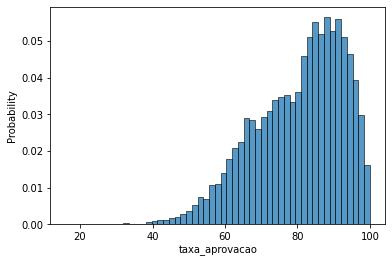

In [ ]:
import seaborn as sns

ideb_2005 = ideb_filtro[ideb_filtro['ano'] == 2005]

sns.histplot(data=ideb_2005, x='taxa_aprovacao', stat='probability');

In [ ]:
from scipy.stats import shapiro

shapiro_test = shapiro(ideb_2005['taxa_aprovacao'])
print(shapiro_test);

ShapiroResult(statistic=0.9564246535301208, pvalue=0.0)


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Com  o valor de p igual a 0 rejeitamos e hipoteses que o dados seguem uma distribuição normal.

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(a=ideb_2005['taxa_aprovacao'], popmean=78, alternative='two-sided')

Ttest_1sampResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95)

### Interpretação

Com o p valor próximo de 0 e considerando nível de significancia de 5% rejeitamos a hipotese nula que a média da taxa de aprovação em 2005 é igual a 78.


# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

### Formulando as hipoteses nula e alternativa 

H0 : A media do ideb para os estados de RS e CE no ano 2019 é igual.

H1 : A media do ideb para os estados de RS e CE no ano 2019 é diferente.

### Determinando nível de significancia

Vamos considerar um nível de significancia de 95%.



In [ ]:
estado = ideb_filtro['sigla_uf'].value_counts()
dic = estado.to_dict()
print(dic.keys())

dict_keys(['MG', 'SP', 'RS', 'BA', 'PR', 'SC', 'GO', 'PB', 'MA', 'PI', 'RN', 'PE', 'CE', 'MT', 'TO', 'PA', 'AL', 'RJ', 'MS', 'ES', 'SE', 'AM', 'RO', 'AC', 'AP', 'RR', 'DF'])


In [ ]:
from scipy.stats import ttest_ind

ttest_ind(ideb_filtro['ideb'][(ideb_filtro['sigla_uf'] == 'RS') & (ideb_filtro['ano'] == 2019)],
          ideb_filtro['ideb'][(ideb_filtro['sigla_uf'] == 'CE') & (ideb_filtro['ano'] == 2019)])

Ttest_indResult(statistic=-4.3200508719663135, pvalue=1.6632800256873896e-05)

### Interpretação

Com o p valor menor que 0,05 podemos rejeitar a hipotese nula que a média do IDEB em 2019 é igual nos estados do Ceara e RS.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

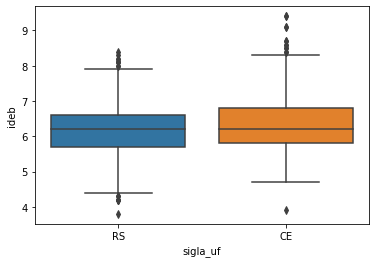

In [ ]:
df_RS = ideb_filtro[(ideb_filtro['sigla_uf'] == 'RS') & (ideb_filtro['ano'] == 2019)]
df_CE = ideb_filtro[(ideb_filtro['sigla_uf'] == 'CE') & (ideb_filtro['ano'] == 2019)]

df_final = pd.concat([df_RS, df_CE])
sns.boxplot(x=df_final['sigla_uf'], y=df_final['ideb']);

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

In [ ]:
df_2005 = ideb_filtro[ideb_filtro['ano'] == 2005]
df_2019 = ideb_filtro[ideb_filtro['ano'] == 2019]

In [ ]:
df_2005_new = df_2005[:300]
df_2019_new = df_2019[:300]

In [ ]:
from scipy.stats import ttest_rel

ttest_rel(df_2005_new['ideb'],
          df_2019_new['ideb'])

Ttest_relResult(statistic=-163.87518962388705, pvalue=8.329734374233758e-295)

### Interpretação

Com o p valor menor que 0,05 podemos rejeitar a hipotese nula que a média do IDEB em 2005 e 2019 é diferente.

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

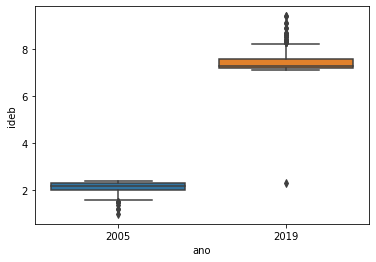

In [ ]:
df_final = pd.concat([df_2005_new, df_2019_new])
sns.boxplot(x=df_final['ano'], y=df_final['ideb']);

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

### Formulando as hipoteses

H0 : A media do IDEB dos tres estados da região sul em 2019 é igual.

H1 : A média do IDEB é diferente em pelo menos um dos estados da região sul.

In [ ]:
df_RS = ideb_filtro[(ideb_filtro['sigla_uf'] == 'RS') & (ideb_filtro['ano'] == 2019)]
df_SC = ideb_filtro[(ideb_filtro['sigla_uf'] == 'SC') & (ideb_filtro['ano'] == 2019)]
df_PR = ideb_filtro[(ideb_filtro['sigla_uf'] == 'PR') & (ideb_filtro['ano'] == 2019)]

In [ ]:
from scipy.stats import f_oneway

f_oneway(df_PR['ideb'],
         df_SC['ideb'],
         df_RS['ideb'])

F_onewayResult(statistic=27.712354138245196, pvalue=1.2331589284254783e-12)

A partir do teste de hipotese da ANOVA, temos um p valor inferior a 0,05 (nível de significância). Por tanto, rejeitamos a hipotese nula que a média do IDEB é igual nos 3 estados.

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

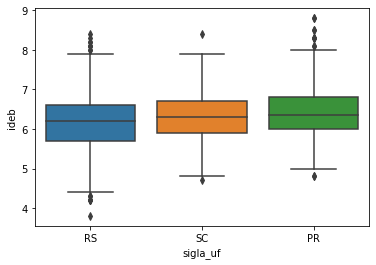

In [ ]:
df_final = pd.concat([df_RS, df_SC, df_PR])

sns.boxplot(x = df_final['sigla_uf'], y = df_final['ideb'])

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df_final['ideb'],
                  groups = df_final['sigla_uf'],
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294  0.001  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171  0.001  0.0414  0.1928   True
----------------------------------------------------


Pelo teste de tukey, a hipotese nula que a média do IDEB é igual em alguns dos estados é rejeitada em todos os casos. Por tanto, a média do IDEB é diferente em cada estado.